QMAP Banana Data 

Have fun!

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import shapiro, anderson, norm

import umap as U

In [74]:
df = pd.read_excel(r'/Users/s/datasets/banana-gc-matrix.xlsx', header=0)

In [75]:
# Drop last 7 columns as they are empty (NaN)
df = df.dropna(axis=1, how='any')

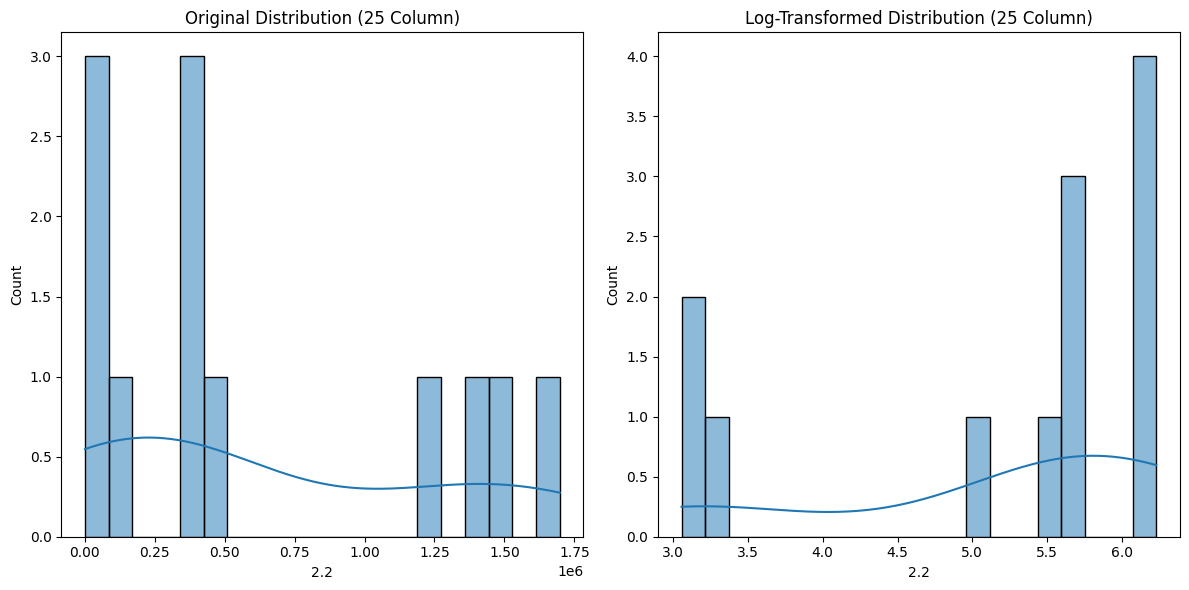

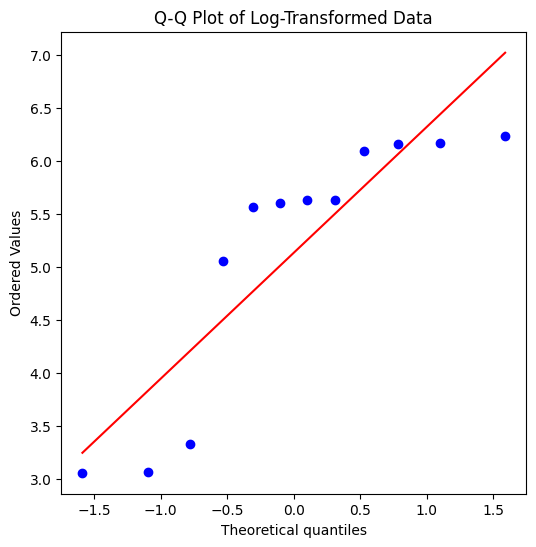

Shapiro-Wilk Test Statistic: 0.7650861738601458, p-value: 0.0038584171061749216
Anderson-Darling Test Statistic: 1.229750807152655
Critical Values: [0.497 0.566 0.679 0.792 0.942]
Significance Level: [15.  10.   5.   2.5  1. ]


In [42]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply log10 to the numeric columns
log_transformed_df = np.log10(numeric_df)


column_id = 24


# Plot histograms of the original data and log-transformed data
plt.figure(figsize=(12, 6))

# Plot the original data's first column (for example)
plt.subplot(1, 2, 1)
sns.histplot(numeric_df.iloc[:,column_id], kde=True, bins=20)
plt.title('Original Distribution ('+ str(column_id+1) +' Column)')

# Plot the log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_df.iloc[:, column_id], kde=True, bins=20)
plt.title('Log-Transformed Distribution ('+ str(column_id+1) + ' Column)')

plt.tight_layout()
plt.show()

# Q-Q plot of the log-transformed data
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(log_transformed_df.iloc[:, column_id], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Data')
plt.show()

# Perform Shapiro-Wilk test for normality on log-transformed data (e.g., first column)
stat, p_value = shapiro(log_transformed_df.iloc[:, column_id].dropna())  # drop NaN values if any
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

# Perform Anderson-Darling test for normality
result = anderson(log_transformed_df.iloc[:, column_id].dropna(), dist='norm')
print(f'Anderson-Darling Test Statistic: {result.statistic}')
print(f'Critical Values: {result.critical_values}')
print(f'Significance Level: {result.significance_level}')

# If p-value of Shapiro-Wilk is high, or Anderson-Darling statistic is below the critical value,
# the log-transformed data may be considered normally distributed, suggesting log-normal distribution.


/var/folders/_4/f_rgwft14s14_j1xnpz_zn7c0000gn/T/ipykernel_1742/1192728993.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


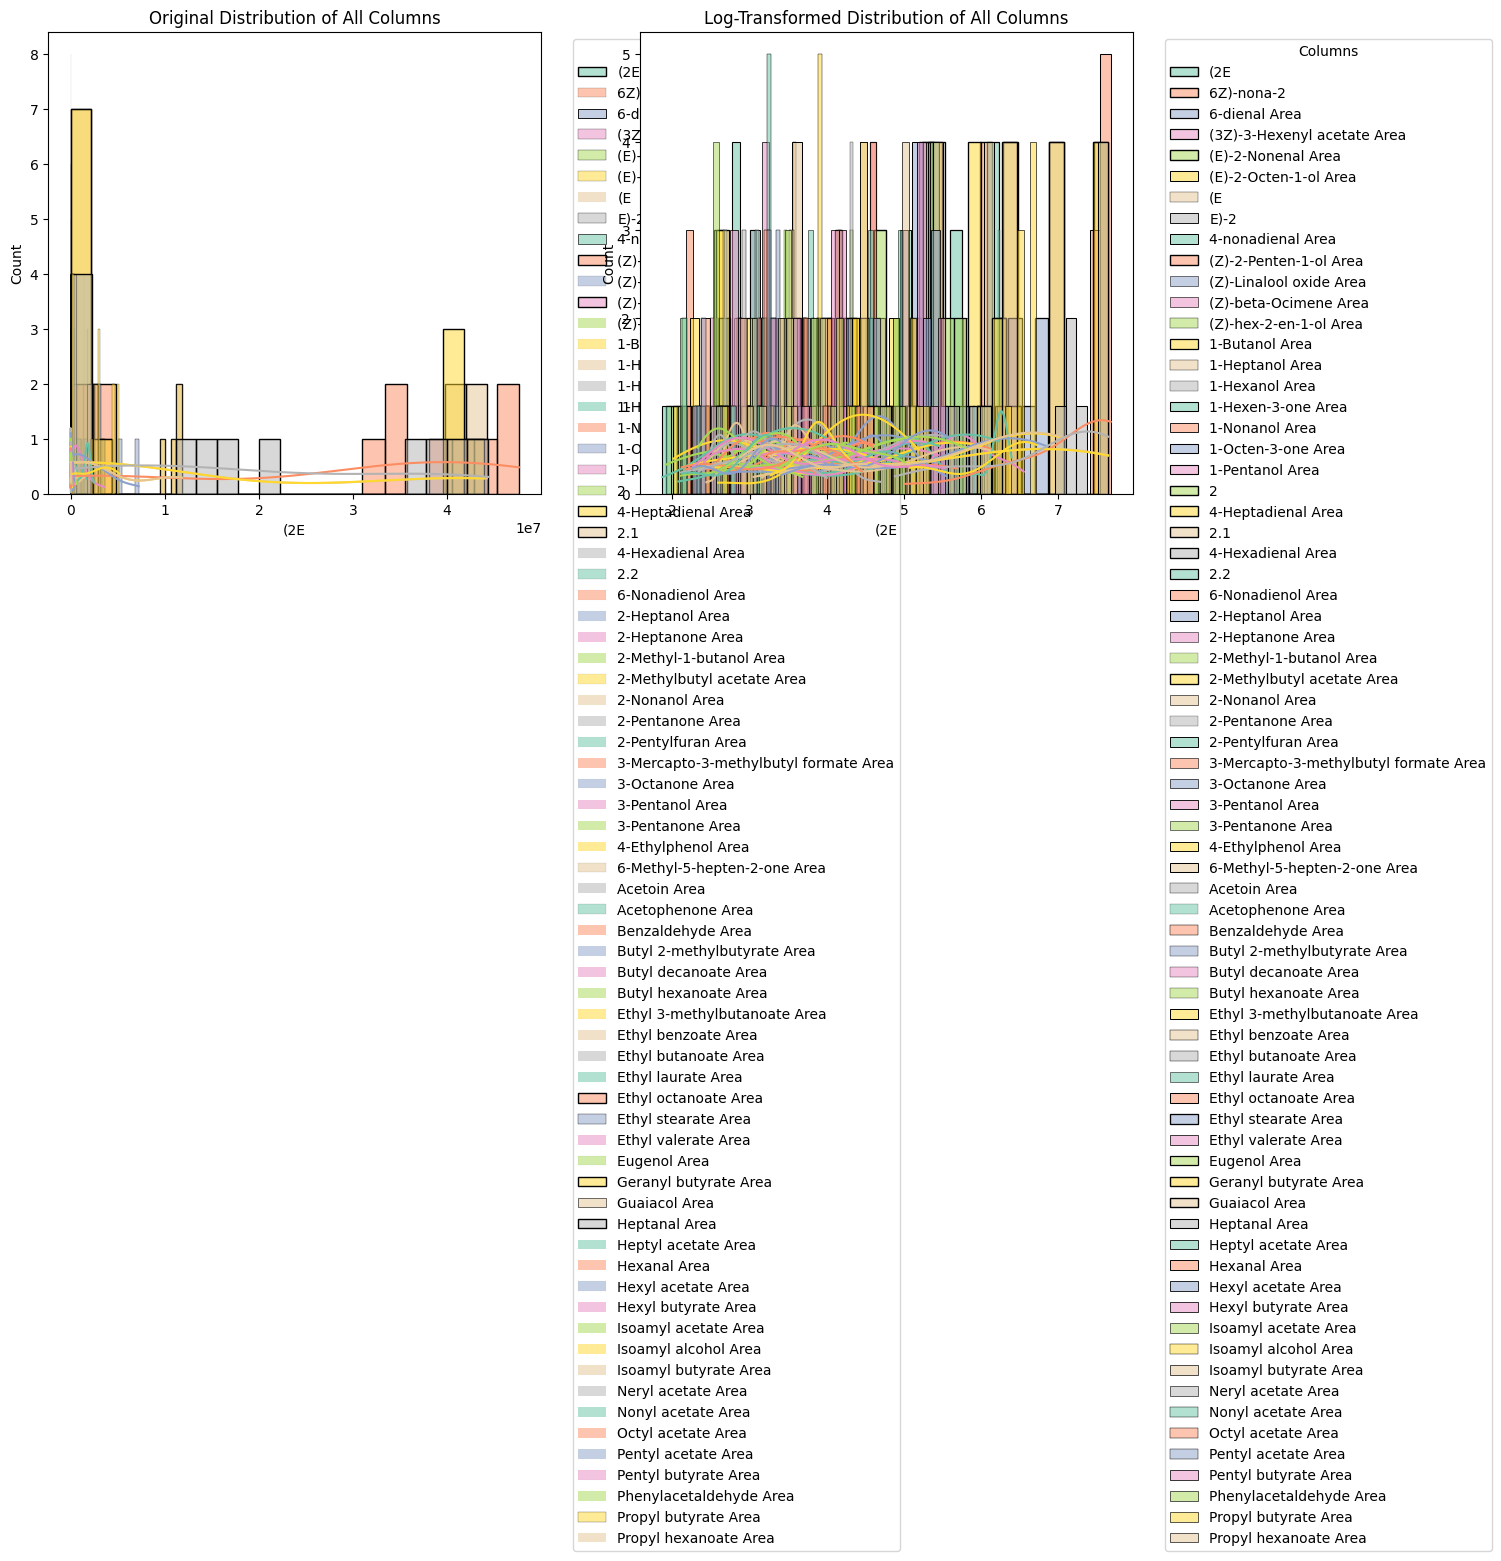

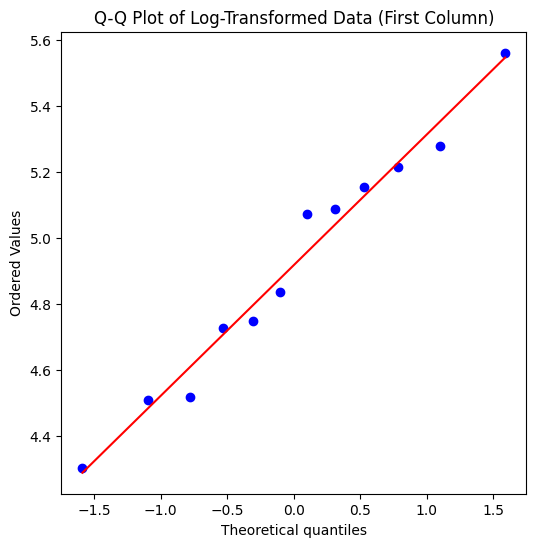

Shapiro-Wilk Test for (2E - Statistic: 0.971702644183878, p-value: 0.927796089266543
Shapiro-Wilk Test for 6Z)-nona-2 - Statistic: 0.9257149749873783, p-value: 0.3368950507714598
Shapiro-Wilk Test for 6-dienal Area - Statistic: 0.8814529940184747, p-value: 0.09148673275565179
Shapiro-Wilk Test for (3Z)-3-Hexenyl acetate Area - Statistic: 0.7497810821506052, p-value: 0.002658320909963994
Shapiro-Wilk Test for (E)-2-Nonenal Area - Statistic: 0.9250163329429381, p-value: 0.3302614633859959
Shapiro-Wilk Test for (E)-2-Octen-1-ol Area - Statistic: 0.8293155762420087, p-value: 0.020581882855211536
Shapiro-Wilk Test for (E - Statistic: 0.93847270194773, p-value: 0.47854339681092206
Shapiro-Wilk Test for E)-2 - Statistic: 0.9526116633146293, p-value: 0.6754232783501677
Shapiro-Wilk Test for 4-nonadienal Area - Statistic: 0.9452781637041554, p-value: 0.5692964696396801
Shapiro-Wilk Test for (Z)-2-Penten-1-ol Area - Statistic: 0.8515128354546179, p-value: 0.038328303692637636
Shapiro-Wilk Test f

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import shapiro, anderson
import scipy.stats as stats

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply log10 to the numeric columns
log_transformed_df = np.log10(numeric_df)

# Create a color palette for the columns
palette = sns.color_palette("Set2", len(numeric_df.columns))

# Plot histograms of the original data and log-transformed data
plt.figure(figsize=(14, 6))

# Plot the original data's columns
plt.subplot(1, 2, 1)
for i, column in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[column], kde=True, bins=20, color=palette[i], label=column)
plt.title('Original Distribution of All Columns')
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the log-transformed data
plt.subplot(1, 2, 2)
for i, column in enumerate(log_transformed_df.columns):
    sns.histplot(log_transformed_df[column], kde=True, bins=20, color=palette[i], label=column)
plt.title('Log-Transformed Distribution of All Columns')
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Q-Q plot of the log-transformed data for the first column (can be adjusted)
plt.figure(figsize=(6, 6))
stats.probplot(log_transformed_df.iloc[:, 0], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Data (First Column)')
plt.show()

# Perform Shapiro-Wilk test for normality on log-transformed data for each column
for column in log_transformed_df.columns:
    stat, p_value = shapiro(log_transformed_df[column].dropna())  # drop NaN values if any
    print(f'Shapiro-Wilk Test for {column} - Statistic: {stat}, p-value: {p_value}')

# Perform Anderson-Darling test for normality for each column
for column in log_transformed_df.columns:
    result = anderson(log_transformed_df[column].dropna(), dist='norm')
    print(f'Anderson-Darling Test for {column} - Statistic: {result.statistic}')
    print(f'Critical Values: {result.critical_values}')
    print(f'Significance Level: {result.significance_level}')


/var/folders/_4/f_rgwft14s14_j1xnpz_zn7c0000gn/T/ipykernel_1742/528558207.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


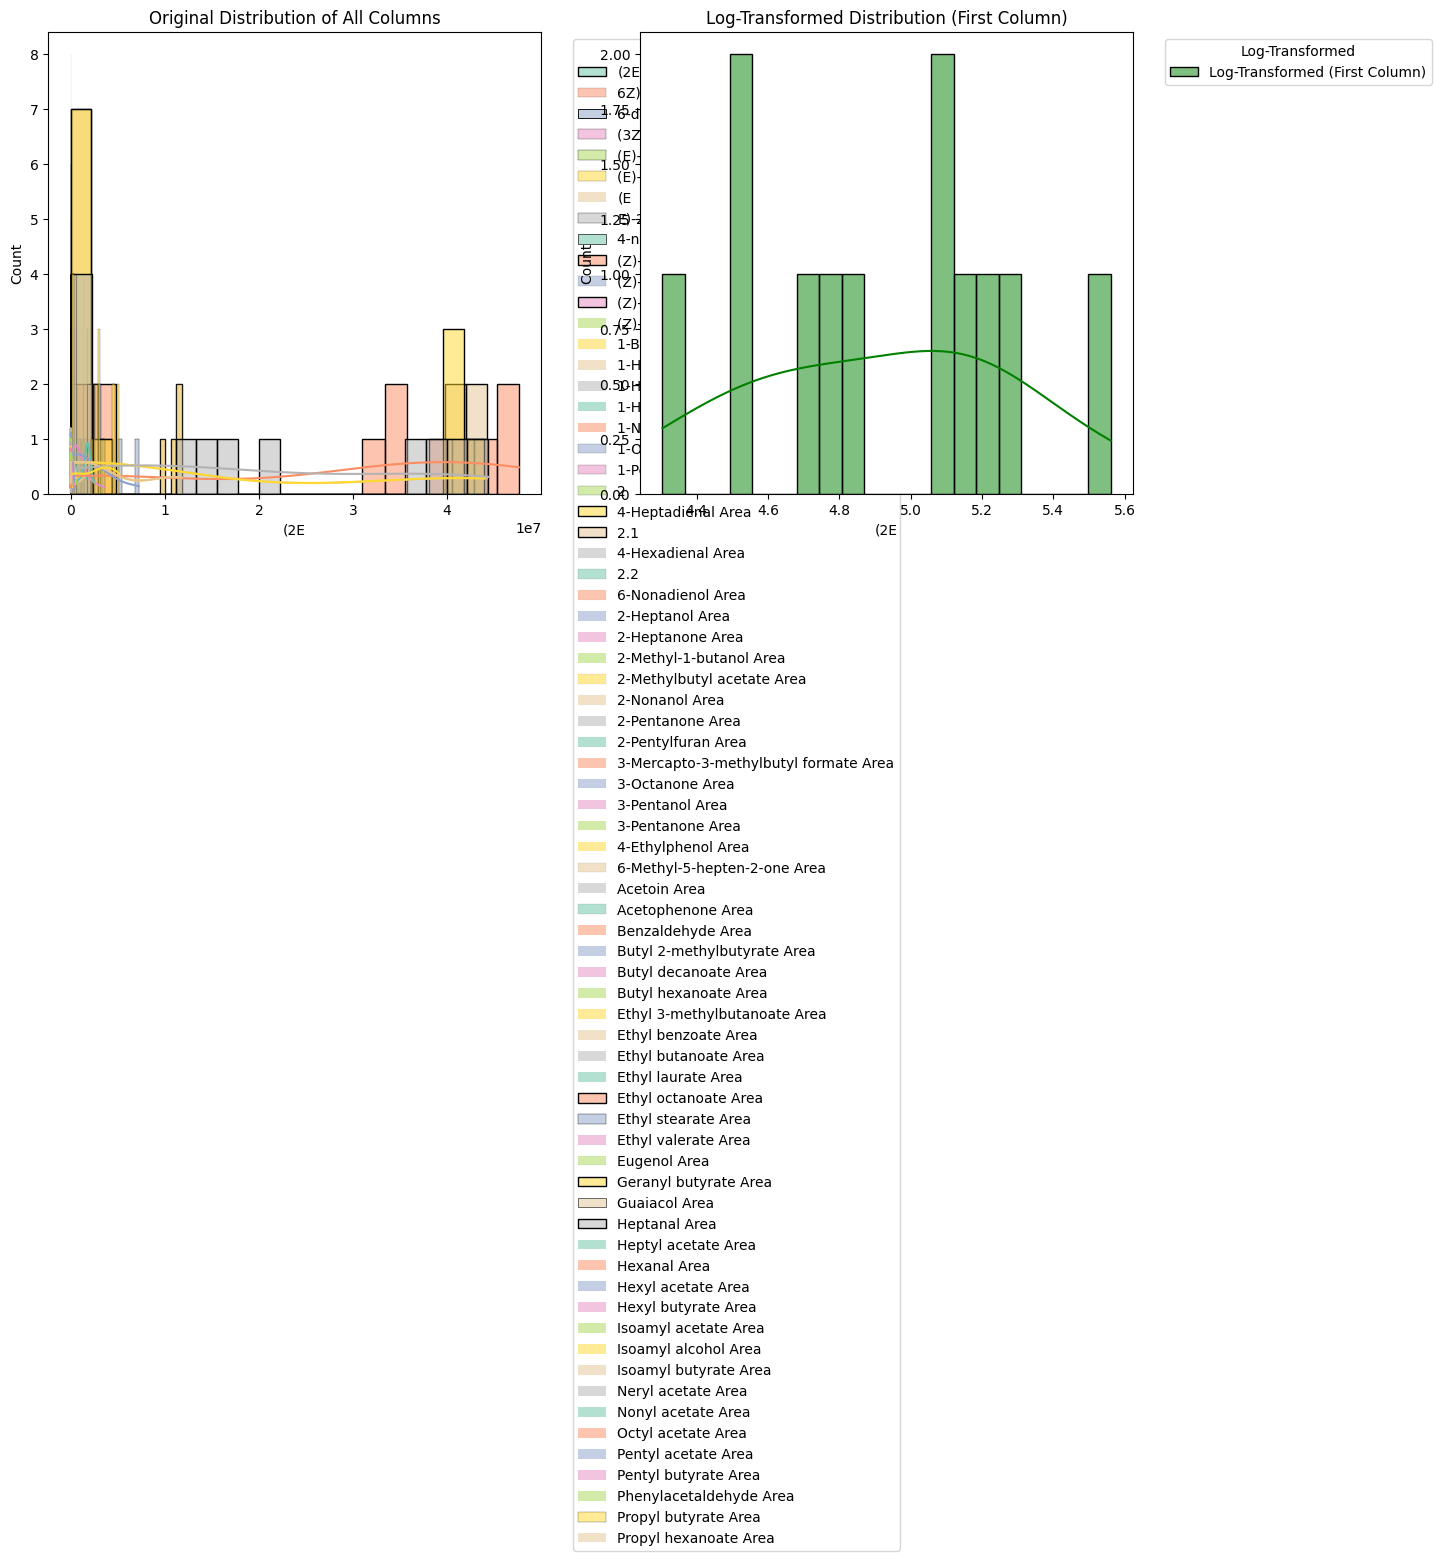

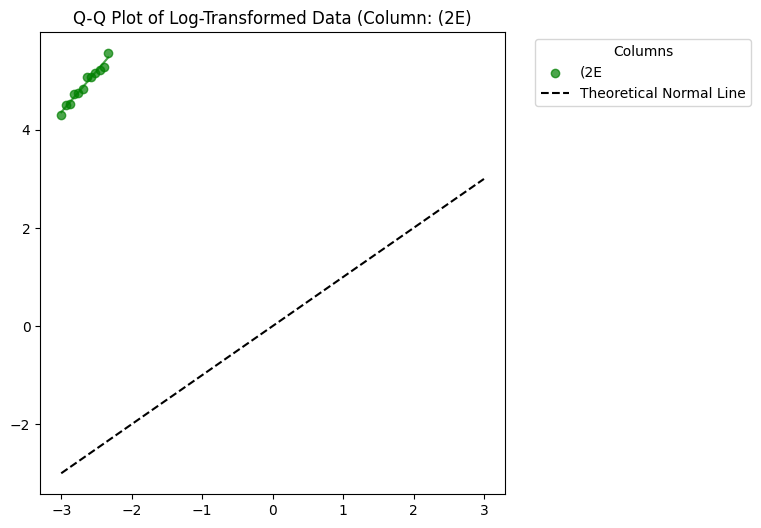

Shapiro-Wilk Test for (2E: Statistic = 0.971702644183878, p-value = 0.927796089266543
Anderson-Darling Test for (2E: Statistic = 0.2142241678798822
Critical Values: [0.497 0.566 0.679 0.792 0.942]
Significance Level: [15.  10.   5.   2.5  1. ]


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import shapiro, anderson
import scipy.stats as stats

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply log10 to each numeric column
log_transformed_df = np.log10(numeric_df)  # log-transform all columns

# Create a color palette for the numeric columns
palette = sns.color_palette("Set2", len(numeric_df.columns))

# Plot histograms of all numeric columns in the original data (overlay)
plt.figure(figsize=(14, 6))

# Plot the original data's columns (numeric_df)
plt.subplot(1, 2, 1)
for i, column in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[column], kde=True, bins=20, color=palette[i], label=column)
plt.title('Original Distribution of All Columns')
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the log-transformed data (one column at a time)
plt.subplot(1, 2, 2)
# Choose the first column from the log-transformed data to plot
sns.histplot(log_transformed_df.iloc[:, 0], kde=True, bins=20, color="green", label="Log-Transformed (First Column)")
plt.title('Log-Transformed Distribution (First Column)')
plt.legend(title="Log-Transformed", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Q-Q plot of the log-transformed data (one column at a time with its own line)
plt.figure(figsize=(6, 6))

# Choose a column (e.g., first log-transformed column) to plot
column_id = 0

# Calculate the common theoretical quantiles for the normal distribution
theoretical_quantiles = np.linspace(-3, 3, 100)  # for standard normal distribution

# Get quantiles for the chosen column (log-transformed)
quantiles = np.sort(log_transformed_df.iloc[:, column_id].dropna())

# Plot the Q-Q plot as points (nodes) with unique color for the column
plt.scatter(theoretical_quantiles[:len(quantiles)], quantiles, color="green", label=numeric_df.columns[column_id], alpha=0.7)

# Add the line of best fit for the column's data
slope, intercept = np.polyfit(theoretical_quantiles[:len(quantiles)], quantiles, 1)
plt.plot(theoretical_quantiles[:len(quantiles)], slope * theoretical_quantiles[:len(quantiles)] + intercept, color="green", linestyle='-', alpha=0.7)

# Plot the common theoretical line for comparison
plt.plot(theoretical_quantiles, theoretical_quantiles, color="black", linestyle='--', label="Theoretical Normal Line")

plt.title(f'Q-Q Plot of Log-Transformed Data (Column: {numeric_df.columns[column_id]})')
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Perform Shapiro-Wilk test for normality on the log-transformed data (for the chosen column)
stat, p_value = shapiro(log_transformed_df.iloc[:, column_id].dropna())  # drop NaN values if any
print(f'Shapiro-Wilk Test for {numeric_df.columns[column_id]}: Statistic = {stat}, p-value = {p_value}')

# Perform Anderson-Darling test for normality on the log-transformed data (for the chosen column)
result = anderson(log_transformed_df.iloc[:, column_id].dropna(), dist='norm')
print(f'Anderson-Darling Test for {numeric_df.columns[column_id]}: Statistic = {result.statistic}')
print(f'Critical Values: {result.critical_values}')
print(f'Significance Level: {result.significance_level}')


/var/folders/_4/f_rgwft14s14_j1xnpz_zn7c0000gn/T/ipykernel_1742/3778540586.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


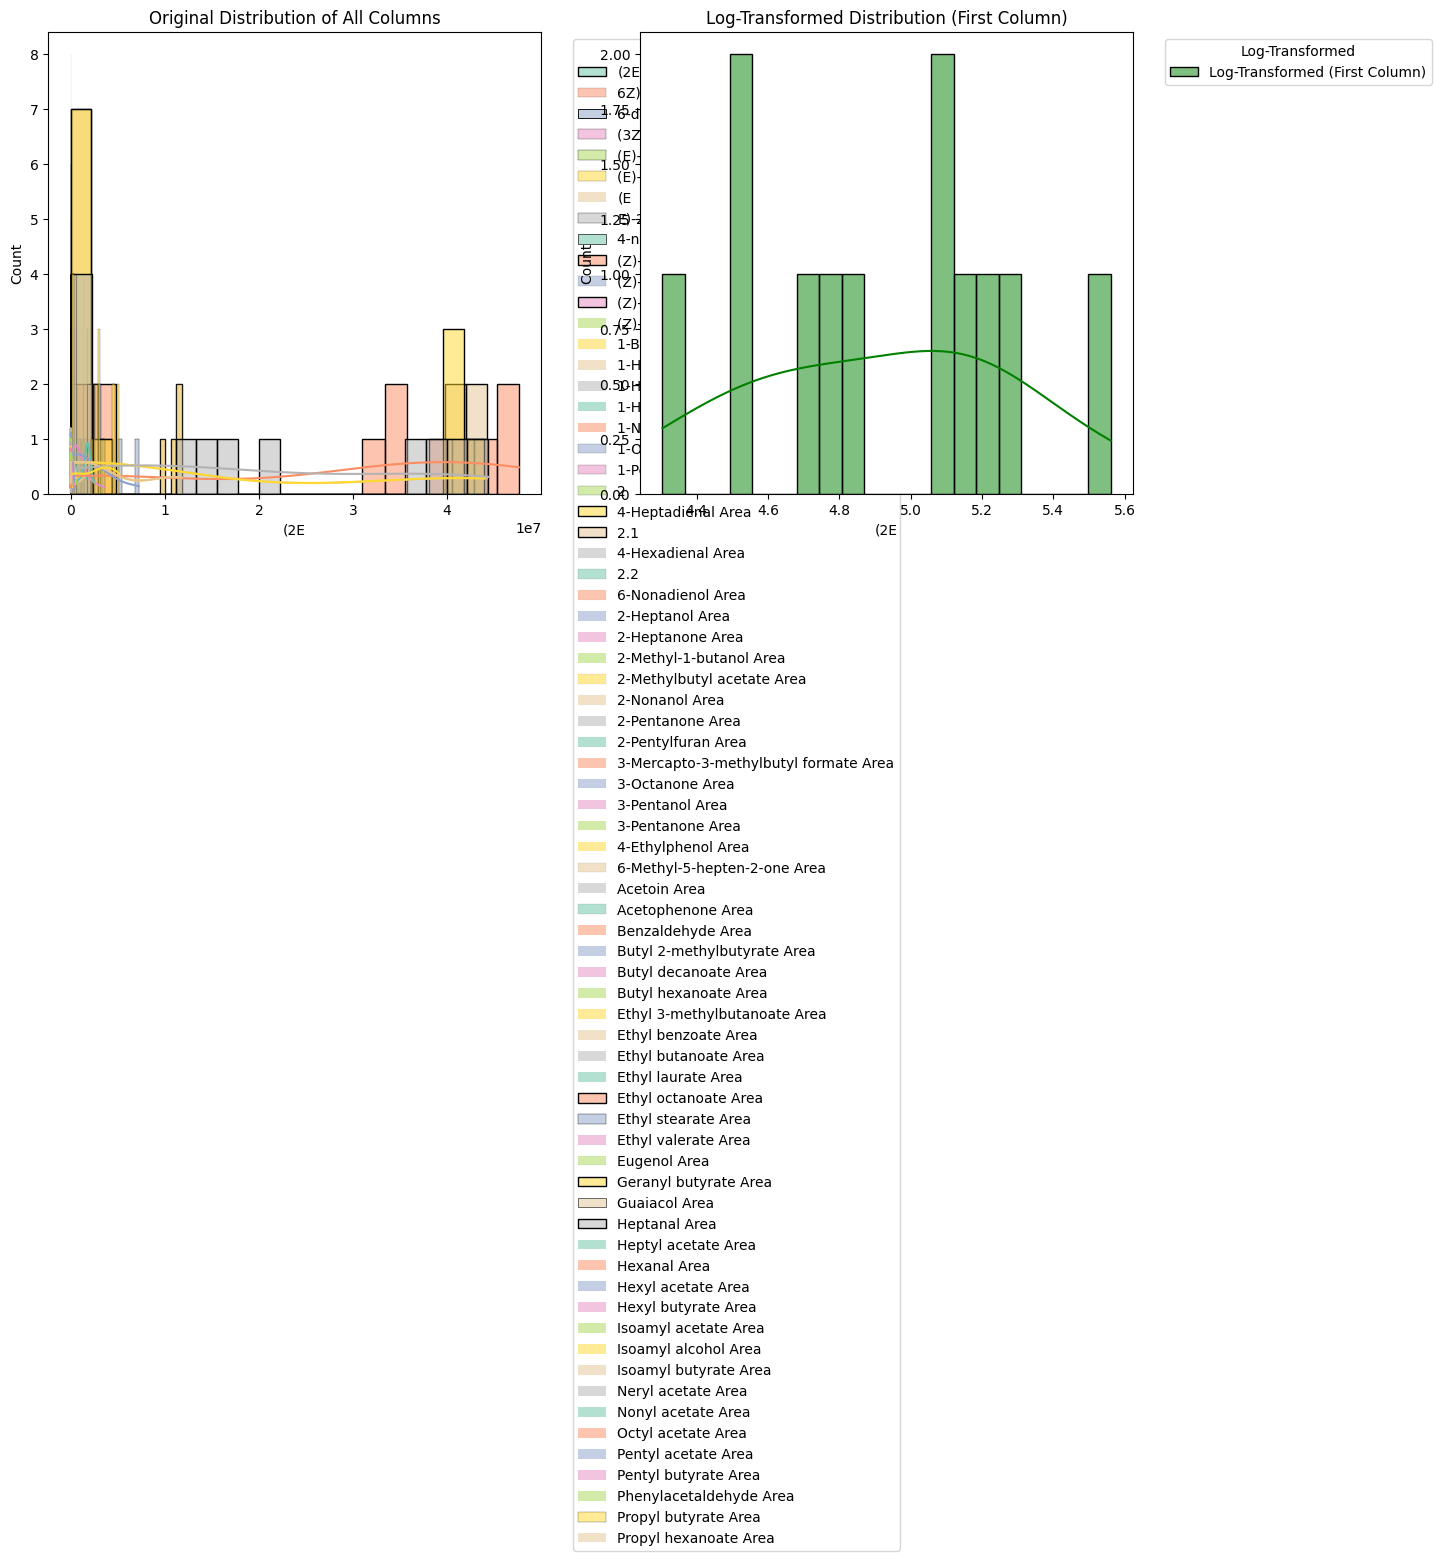

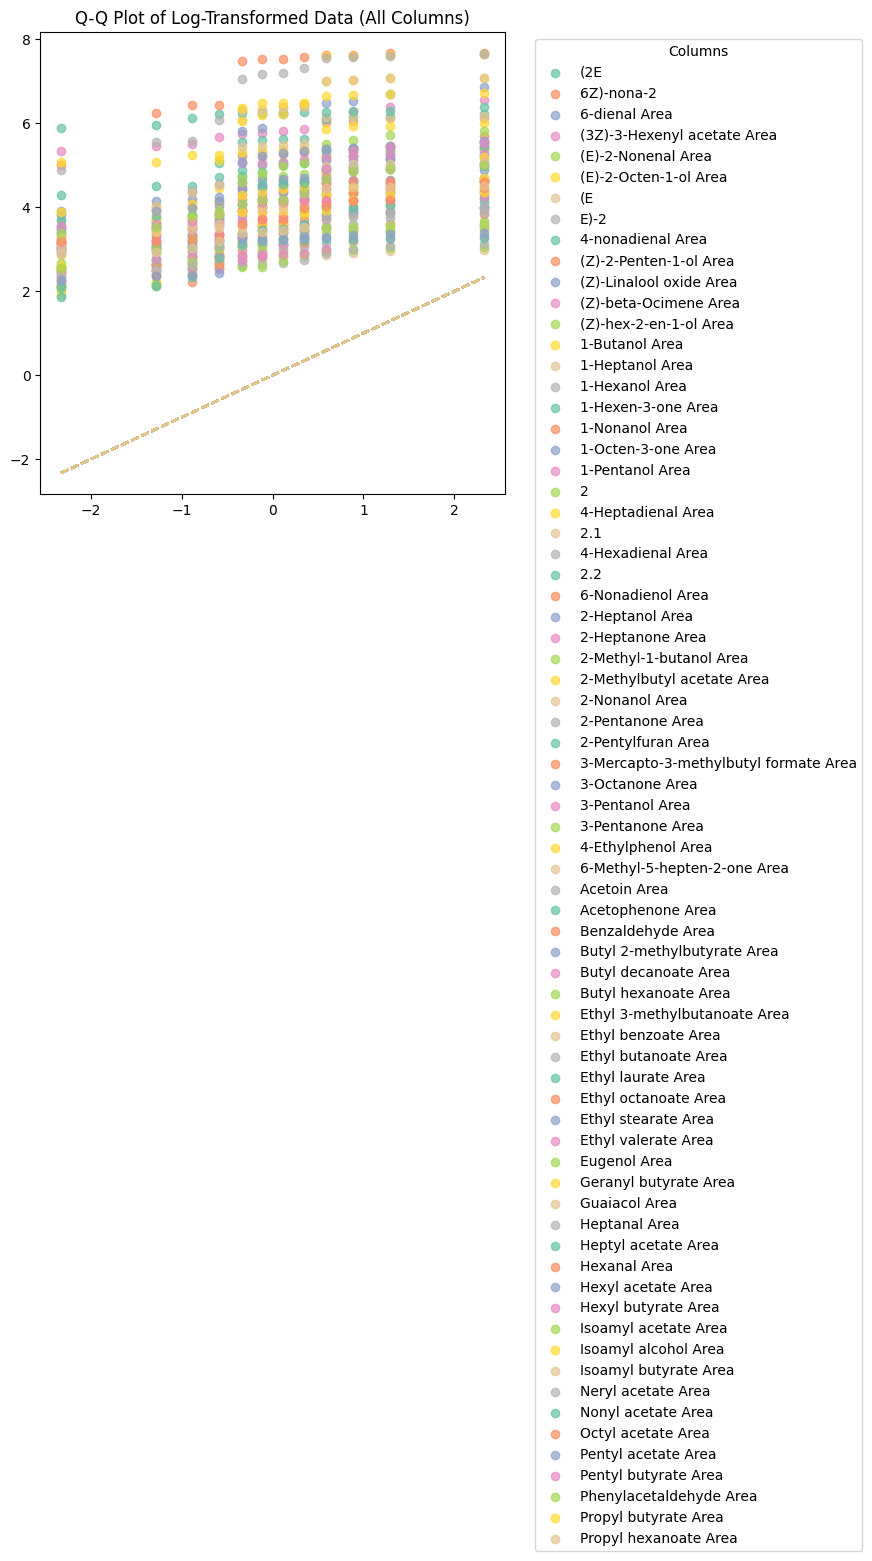

Shapiro-Wilk Test for (2E: Statistic = 0.971702644183878, p-value = 0.927796089266543
Shapiro-Wilk Test for 6Z)-nona-2: Statistic = 0.9257149749873783, p-value = 0.3368950507714598
Shapiro-Wilk Test for 6-dienal Area: Statistic = 0.8814529940184747, p-value = 0.09148673275565179
Shapiro-Wilk Test for (3Z)-3-Hexenyl acetate Area: Statistic = 0.7497810821506052, p-value = 0.002658320909963994
Shapiro-Wilk Test for (E)-2-Nonenal Area: Statistic = 0.9250163329429381, p-value = 0.3302614633859959
Shapiro-Wilk Test for (E)-2-Octen-1-ol Area: Statistic = 0.8293155762420087, p-value = 0.020581882855211536
Shapiro-Wilk Test for (E: Statistic = 0.93847270194773, p-value = 0.47854339681092206
Shapiro-Wilk Test for E)-2: Statistic = 0.9526116633146293, p-value = 0.6754232783501677
Shapiro-Wilk Test for 4-nonadienal Area: Statistic = 0.9452781637041554, p-value = 0.5692964696396801
Shapiro-Wilk Test for (Z)-2-Penten-1-ol Area: Statistic = 0.8515128354546179, p-value = 0.038328303692637636
Shapiro-W

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import shapiro, anderson
import scipy.stats as stats

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply log10 to each numeric column
log_transformed_df = np.log10(numeric_df)  # log-transform all columns

# Create a color palette for the columns
palette = sns.color_palette("Set2", len(numeric_df.columns))

# Plot histograms of all numeric columns in the original data
plt.figure(figsize=(14, 6))

# Plot the original data's columns
plt.subplot(1, 2, 1)
for i, column in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[column], kde=True, bins=20, color=palette[i], label=column)
plt.title('Original Distribution of All Columns')
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the log-transformed data (only one column)
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_df.iloc[:, 0], kde=True, bins=20, color="green", label="Log-Transformed (First Column)")
plt.title('Log-Transformed Distribution (First Column)')
plt.legend(title="Log-Transformed", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Q-Q plot of the log-transformed data (overlay all columns with different colors and each node different color)
plt.figure(figsize=(6, 6))

# Plot Q-Q plots for all log-transformed columns with different colors
for i, column in enumerate(log_transformed_df.columns):
    # Get quantiles and theoretical quantiles for each column
    quantiles = np.sort(log_transformed_df.iloc[:, i].dropna())
    # Calculate theoretical quantiles for each column
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(quantiles)))
    
    # Plot the Q-Q plot as points (nodes) with unique color for each column
    plt.scatter(theoretical_quantiles, quantiles, color=palette[i], label=column, alpha=0.7)

    # Plot the theoretical line (the straight line) for this column with the same color as the points
    plt.plot(theoretical_quantiles, theoretical_quantiles, color=palette[i], linestyle='--')

plt.title('Q-Q Plot of Log-Transformed Data (All Columns)')
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Perform Shapiro-Wilk test for normality on log-transformed data (for each column)
for column in log_transformed_df.columns:
    stat, p_value = shapiro(log_transformed_df[column].dropna())  # drop NaN values if any
    print(f'Shapiro-Wilk Test for {column}: Statistic = {stat}, p-value = {p_value}')

# Perform Anderson-Darling test for normality (for each column)
for column in log_transformed_df.columns:
    result = anderson(log_transformed_df[column].dropna(), dist='norm')
    print(f'Anderson-Darling Test for {column}: Statistic = {result.statistic}')
    print(f'Critical Values: {result.critical_values}')
    print(f'Significance Level: {result.significance_level}')


In [76]:
# Set Index
df = df.set_index('Unnamed: 0')


In [77]:
log_df = np.log10(df)

In [78]:
print(log_df)

                        (2E  6Z)-nona-2  6-dienal Area  \
Unnamed: 0                                               
Green_Banana_1     5.561109    2.480007       5.142777   
Ripe_Banana_3      5.215490    4.165719       4.227784   
Overripe_Banana_2  4.518251    3.302547       3.668572   
Green_Banana_4     5.278790    3.058426       5.165304   
Ripe_Banana_5      5.086741    4.386659       4.193820   
Overripe_Banana_1  4.748149    3.327767       3.619093   
Ripe_Banana_2      5.073355    4.162056       3.495960   
Green_Banana_3     4.728532    3.081347       4.725838   
Overripe_Banana_3  4.508786    3.451172       3.827111   
Green_Banana_2     4.835405    2.984977       4.999043   
Overripe_Banana_4  4.303995    3.392697       4.010427   
Ripe_Banana_1      5.155309    4.106531       3.709270   

                   (3Z)-3-Hexenyl acetate Area  (E)-2-Nonenal Area  \
Unnamed: 0                                                           
Green_Banana_1                        3.074085 

Assuming everything went well to here you have df and log_df. 
df = original
log_df = log10 transformed data

In [82]:
# Ensure that the column names are strings

scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_df)

#Principal Component Analysis
pca = PCA(n_components =3)
pca_result = pca.fit_transform(scaled_data)

#make a df for this 3d graph
pca_df = pd.DataFrame(data = pca_result, columns = [f'PC{i+1}' for i in range (pca_result.shape[1])])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PCA3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

'''
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()
'''

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.